# WeatherPy
----

### Analysis
* Please do not grade this notebook, this was just created as an experiment to see if some of the graphs would show more interesting patterns in a 3D plot. 
* All save functions have been commented out. 
* No appreciable differences or effects shown across longitude. 

---


### Import Dependencies

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
import openweathermapy as owm

# 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

### Function List

In [2]:
# Generate list of random cities
def random_cities():    
    # List for holding lat_lngs and cities (notebook starter code)
    lat_lngs = []
    cities = []

    # Create a set of random lat and lng combinations
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)
    return cities

# Return weather information for a list of cities
def city_weather(cities):    
    settings = {"units": "imperial", "appid": api_key}
    all_weather = []
    i = 1

    for city in cities:
        try:
            weather = owm.get_current(city, **settings)
            print(f'Processing Record {i} of {len(cities)} | {city}')
            all_weather.append(weather)
            i += 1
        except:
            print("City not found. Skipping...")
            i += 1
    return all_weather

# Turn list of open weather city data dictionaries into a dataframe
def weather_frame(all_weather):    
    column_names = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Longitude', 'Lattitude', 'Max Temperature', 'Wind Speed']
    summary = ["name", "clouds.all", "sys.country", "dt", "main.humidity", "coord.lon", "coord.lat", "main.temp_max", "wind.speed"]

    weather_summary = [response(*summary) for response in all_weather]
    weather_df = pd.DataFrame(weather_summary, columns=column_names)
    weather_df = weather_df.dropna()
    weather_df = weather_df.set_index('City')
    weather_df = weather_df[weather_df.Humidity < 105] # Remove rows where humidity is significantly above 100%
    return weather_df

# Plot Lattitude vs selected column
def lattitude_vs(data, column, y_label):
    data.plot.scatter('Lattitude', column, edgecolors='k', s=40, alpha=.85)
    today = date.today()
    plt.title(f'City Lattitude vs {column} {today}')
    plt.ylabel(y_label)
    plt.grid()
    #plt.savefig(f'Lattitude vs {column}.png')
    plt.show()

### Generate City List and Perform API Calls
* Generate random list of cities
* Perform a weather check on each city using a series of successive API calls.
* Repeat list generation and weather check until more than 500 cities are included in the data set
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
cities = random_cities()
all_weather = city_weather(cities)
while len(all_weather) < 500:
    cities = random_cities()
    all_weather = city_weather(cities)

Processing Record 1 of 593 | kruisfontein
Processing Record 2 of 593 | lagos
Processing Record 3 of 593 | esperance
Processing Record 4 of 593 | east london
Processing Record 5 of 593 | bereda
Processing Record 6 of 593 | hofn
Processing Record 7 of 593 | nome
Processing Record 8 of 593 | tateyama
Processing Record 9 of 593 | khatanga
Processing Record 10 of 593 | tungor
Processing Record 11 of 593 | pouebo
Processing Record 12 of 593 | rikitea
City not found. Skipping...
Processing Record 14 of 593 | port blair
City not found. Skipping...
Processing Record 16 of 593 | whitehorse
Processing Record 17 of 593 | buin
Processing Record 18 of 593 | hobart
Processing Record 19 of 593 | alta floresta
Processing Record 20 of 593 | paamiut
Processing Record 21 of 593 | kavaratti
Processing Record 22 of 593 | gravdal
City not found. Skipping...
Processing Record 24 of 593 | punta arenas
Processing Record 25 of 593 | puerto ayora
Processing Record 26 of 593 | nkayi
Processing Record 27 of 593 | l

Processing Record 215 of 593 | adre
Processing Record 216 of 593 | ulaangom
Processing Record 217 of 593 | fortuna
Processing Record 218 of 593 | union
Processing Record 219 of 593 | tucupita
Processing Record 220 of 593 | bonthe
Processing Record 221 of 593 | ahome
City not found. Skipping...
Processing Record 223 of 593 | aborlan
Processing Record 224 of 593 | biltine
Processing Record 225 of 593 | san cristobal
Processing Record 226 of 593 | umm lajj
Processing Record 227 of 593 | miles city
Processing Record 228 of 593 | lompoc
Processing Record 229 of 593 | seoul
Processing Record 230 of 593 | newry
Processing Record 231 of 593 | marawi
Processing Record 232 of 593 | tamahu
Processing Record 233 of 593 | kiunga
Processing Record 234 of 593 | arraial do cabo
Processing Record 235 of 593 | lagoa
Processing Record 236 of 593 | trincomalee
Processing Record 237 of 593 | pringsewu
Processing Record 238 of 593 | maragogi
Processing Record 239 of 593 | batemans bay
Processing Record 240 

Processing Record 428 of 593 | talara
Processing Record 429 of 593 | hay river
Processing Record 430 of 593 | viedma
Processing Record 431 of 593 | constitucion
Processing Record 432 of 593 | bitung
Processing Record 433 of 593 | ucluelet
Processing Record 434 of 593 | serenje
Processing Record 435 of 593 | kamenka
Processing Record 436 of 593 | evanston
Processing Record 437 of 593 | ust-nera
Processing Record 438 of 593 | itaporanga
Processing Record 439 of 593 | bahia honda
Processing Record 440 of 593 | shawnee
Processing Record 441 of 593 | vestmannaeyjar
Processing Record 442 of 593 | longonjo
Processing Record 443 of 593 | laguna
Processing Record 444 of 593 | marsa matruh
Processing Record 445 of 593 | namwala
Processing Record 446 of 593 | fomboni
Processing Record 447 of 593 | hammerfest
Processing Record 448 of 593 | dzaoudzi
Processing Record 449 of 593 | harnosand
Processing Record 450 of 593 | chinchani
Processing Record 451 of 593 | ancud
Processing Record 452 of 593 | a

### Turn Raw Data into DataFrame
* Convert data into DataFrame
* Save DataFrame to CSV
* Display top of Weather DataFrame

In [4]:
# Convert data to DataFrame
weather_df = weather_frame(all_weather)

# Save dataframe as a CSV
#weather_df.to_csv('weather_data.csv')

# Display top of DataFrame
weather_df.head()

,Cloudiness,Country,Date,Humidity,Longitude,Lattitude,Max Temperature,Wind Speed
City,,,,,,,,
Kruisfontein,76,ZA,1554437094,84,24.73,-34.00,63.05,10.65
Lagos,40,NG,1554433200,94,3.39,6.46,75.20,4.70
Esperance,20,TT,1554437110,78,-61.45,10.24,77.00,6.96
East London,90,ZA,1554435660,93,27.91,-33.02,60.80,16.11
Bereda,0,ES,1554437515,86,-7.54,43.27,46.00,8.05


### Plotting the Data
* Use plotting function with dataframe, column, and Y label passed as variables
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

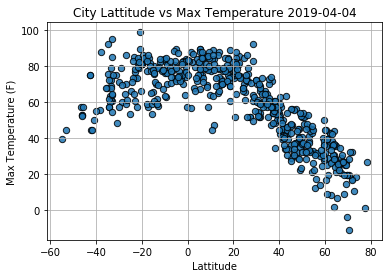

In [5]:
lattitude_vs(weather_df, 'Max Temperature', 'Max Temperature (F)')

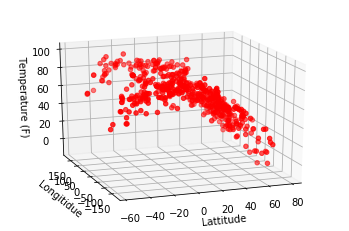

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =weather_df.Lattitude
y =weather_df.Longitude
z =weather_df['Max Temperature']



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Lattitude')
ax.set_ylabel('Longitidue')
ax.set_zlabel('Temperature (F)')

ax.view_init(20, 250)
plt.show()

#### Latitude vs. Humidity Plot

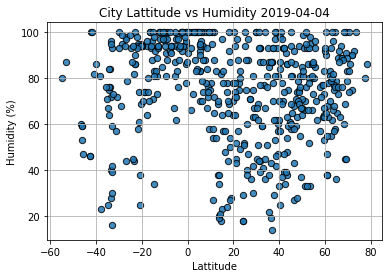

In [6]:
lattitude_vs(weather_df, 'Humidity', 'Humidity (%)')

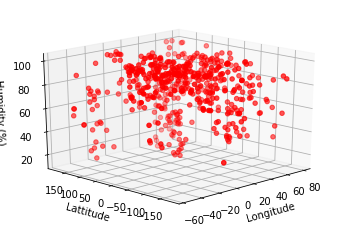

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =weather_df.Lattitude
y =weather_df.Longitude
z =weather_df.Humidity



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Longitude')
ax.set_ylabel('Lattitude')
ax.set_zlabel('Humidity (%)')

ax.view_init(20, 225)
plt.show()

#### Latitude vs. Cloudiness Plot

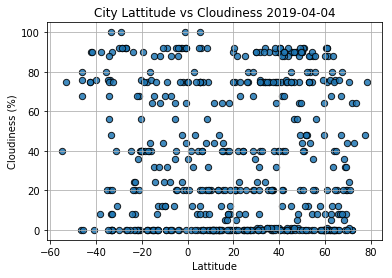

In [7]:
lattitude_vs(weather_df, 'Cloudiness', 'Cloudiness (%)')

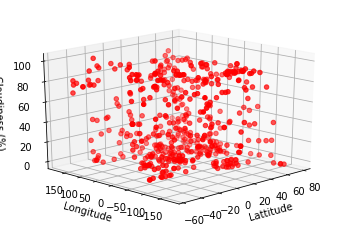

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =weather_df.Lattitude
y =weather_df.Longitude
z =weather_df.Cloudiness



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Lattitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Cloudiness (%)')

ax.view_init(20,225)
plt.show()

#### Latitude vs. Wind Speed Plot

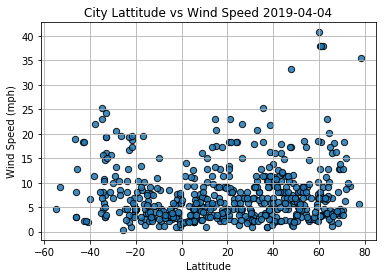

In [8]:
lattitude_vs(weather_df, 'Wind Speed', 'Wind Speed (mph)')

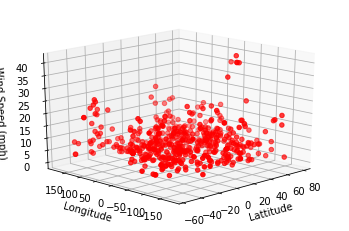

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =weather_df.Lattitude
y =weather_df.Longitude
z =weather_df['Wind Speed']



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Lattitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Wind Speed (mph)')

ax.view_init(20, 225)
plt.show()